# Figure 3

**A.** Number of units significantly modulated by task, arousal, or both in A1 (left) and IC (right). The total number of recorded units is reported in the center of the doughnut plots. Significance was determined by cross-validated jackknifed t-test, at a cut-off p < 0.05. Purple and green symbols correspond to units with significant unique modulation of task or pupil, respectively. Black symbols correspond to units for which both unique task and pupil contributions are significant. Dark grey symbols correspond to units for which the contribution of task and pupil to model prediction is significant only when both variables are present in the model. Light gray indicates units for which there is no significant improvement in prediction accuracy between full and null models. 

**B.** Variance explained (R2) in single-trial activity by full model versus null model. Each symbol represents a unit in AC (left) or IC (right; circles for NCIC and triangles for ICC units). Colors as in A. 

**C.** Active/passive unique variance explained by pupil size (R_AP^2  pupil unique, x-axis) plotted against unique variance explained by task engagement (R_AP^2  task unique, y-axis). Star symbols correspond to examples in Figure 3.2A-D (purple) and E-H (green). Arrow indicates unit with significant R_AP^2  task unique value of 0.23. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sci
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl
from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model
from nems_lbhb.pupil_behavior_scripts.mod_per_state import aud_vs_state
from nems_lbhb.pupil_behavior_scripts.mod_per_state import hlf_analysis
from nems_lbhb.stateplots import model_per_time_wrapper, beta_comp
from functions import *

%matplotlib inline
os.getcwd()

color_b = '#C768D8'
color_p = '#47BF55'
color_both = 'black'
color_either = '#595959'
color_ns = 'lightgrey'

savefigs = True
figs_dir = '/Users/daniela/Documents/2018/AC_IC_project_2018/Task_engagement_pupil_paper/figures'
path=os.getcwd()

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2019-07-18 154946.log


In [2]:
# RUN IF NOT CONNECTED TO SERVER 
# A1 SUA+MUA: pup vs. beh 307 per state dataframe
#d_pb307 = pd.read_csv('d_307_pb.csv') #model sdexp.S rerun November 8 
d_pb307 = pd.read_csv('d_307_pb_updated.csv') #model s_sdexp.S rerun January 5 by SVD
d_pb307 = d_pb307.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pb307['R2'] = d_pb307['r']**2 * np.sign(d_pb307['r'])

In [3]:
d_pb307.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
0,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.4293,0.452884,0.025611,0.026288,1.022688,baseline,0.205103
1,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.010855,95.4293,0.452884,0.025611,0.013340,0.027984,pupil,0.205103
2,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,-0.000702,95.4293,0.452884,0.025611,0.031175,0.021035,active,0.205103
3,BRT039c-03-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.0000,0.503120,0.023189,0.000657,1.033564,baseline,0.253130
4,BRT039c-03-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,-0.005557,95.0000,0.503120,0.023189,0.005256,0.022866,pupil,0.253130


**Find A1 units for which the model prediction with behavior as only state variable signifantly predicts behavior modulation**  
significant beh only cells = r_pup0_beh - r_pup0_beh0 > rse_pup0_beh + rse_pup0_beh0 where 'r' is Pearson's correlation

In [4]:
cellid_sig_307_beh = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'beh')

**Find A1 units for which the unique contribution of behavior is significant**  
significant beh unique cells = r_pup_beh - r_pup_beh0 > rse_pup_beh + rse_pup_beh0 where 'r' is Pearson's correlation

In [5]:
cellid_sig_307_ubeh = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'ubeh')

**Find A1 units for which the unique contribution of pupil is significant**  
significant pupil unique cells = r_pup_beh - r_pup0_beh > rse_pup_beh + rse_pup0_beh where 'r' is Pearson's correlation

In [6]:
cellid_sig_307_upup = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'upup')

**Find A1 units for which the full state model is significant better than the null model (ambiguous)**   
significant state cells = r_pup_beh - r_pup0_beh0 > rse_pup_beh + rse_pup0_beh0 where 'r' is Pearson's correlation

In [7]:
cellid_sig_307_state = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'state')

In [8]:
print(len(cellid_sig_307_state))
print(len(cellid_sig_307_upup))
print(len(cellid_sig_307_ubeh))

51
16
15


In [9]:
# add three columns to original data frame with sign cells per category
d_pb307['sig_ubeh'] = d_pb307['cellid'].isin(set(cellid_sig_307_ubeh))
d_pb307['sig_upup'] = d_pb307['cellid'].isin(set(cellid_sig_307_upup))
d_pb307['sig_state'] = d_pb307['cellid'].isin(set(cellid_sig_307_state))

**Scatter plot of R2beh unique vs R2pup unique in A1**  
`(R2pup0beh - R2pup0beh0) vs (R2pupbeh0 - R2pup0beh0)`

In [10]:
# use one_state funciton to pull a dataframe containing R2beh unique, wich is the difference between R2pupbeh and R2pupbeh0
d307_R2_beh_unique = one_state(d_pb307, col_idx='R2', state='unique', state_chan_val='active', 
                               state_sig1='st.pup.beh', state_sig2='st.pup.beh0', state_var='task', 
                               condition='pb', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

In [11]:
# use one_state funciton to pull a dataframe containing R2pup unique, wich is the difference between R2pupbeh and R2pup0beh
d307_R2_pup_unique = one_state(d_pb307, col_idx='R2', state='unique', state_chan_val='pupil', 
                               state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb',
                               state_var='pupil', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

In [12]:
xlim=(-0.05,0.25)
xlim

(-0.05, 0.25)

not sig n = 78
ubeh or upup n = 24
ubeh n = 11
upup n = 12
ubeh and upup = 4


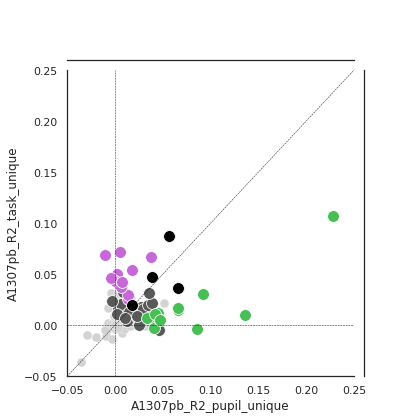

In [13]:
scatter_states(df1=d307_R2_pup_unique, 
               df2=d307_R2_beh_unique,
               margin=False, 
               area='A1',
               column1='R2_pupil_unique', 
               column2='R2_task_unique',
               unit_set='A1307pb', 
               xlim=(-0.05,0.25), ylim=(-0.05,0.25), 
               dot_size1=80, dot_size2=140)

In [14]:
# verify if correlation is significant
(cc_R2_307, p_R2_307)=sci.stats.pearsonr(d307_R2_pup_unique['R2_pupil_unique'], d307_R2_beh_unique['R2_task_unique'])
print(cc_R2_307, p_R2_307)

0.39838294141384734 2.928497721436365e-06
